<h2 style="color:lightblue" align="center">Health Insurance Lead Prediction</h2>

## Problem Statement

Our Client FinMan is a financial services company that provides various financial services like loan, investment funds, insurance etc. to its customers.
FinMan wishes to cross-sell health insurance to the existing customers who may or may not hold insurance policies with the company.
The company recommend health insurance to it's customers based on their profile once these customers land on the website.
Customers might browse the recommended health insurance policy and consequently fill up a form to apply.
When these customers fill-up the form, their response towards the policy is considered positive and they are classified as a lead.
Once these leads are acquired, the sales advisors approach them to convert and thus the company can sell proposed health insurance to these leads in a more efficient manner.

Now the company needs your help in building a model to predict whether the person will be interested in their proposed Health plan/policy given the information about:

    Demographics (city, age, region etc.)
    Information regarding holding policies of the customer
    Recommended Policy Information


## Table of Content

* __Step 1: Importing the Relevant Libraries__
    
* __Step 2: Data Inspection__
    
* __Step 3: Data Cleaning__
    
* __Step 4: Exploratory Data Analysis__
    
* __Step 5: Feature Engineering__

* __Step 6: Building Model__
 

### Step 1: Importing the Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Step 2: Data Inspection

In [2]:
# Load the train and test csv files into dataframes.
train = pd.read_csv("train_Df64byy.csv")
test = pd.read_csv("test_YCcRUnU.csv")

In [3]:
# Return a tuple representing the dimensionality of the DataFrames.
train.shape, test.shape

((50882, 14), (21805, 13))

__This shows that we have 50882 rows and 14 columns in Train set whereas Test set has 21805 rows and 13 columns.__

In [4]:
# First 5 rows data
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [5]:
# Ratio of null values
train.isnull().sum()/train.shape[0] *100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [6]:
# Ratio of null values
test.isnull().sum()/test.shape[0] *100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           23.054345
Holding_Policy_Duration    39.454254
Holding_Policy_Type        39.454254
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
dtype: float64

__This shows that we have 23%, 39% and 39% of missing values in Health Indicator, Holding_Policy_Duration and Holding_Policy_Type columns respectively.__

__Now we will find out the count of numerical and categorical features__

In [7]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 6
Numerical Features in Train Set: 8


In [8]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 6
Numerical Features in Test Set: 7


__We will see unique categories of some features__

In [9]:
print(train['Accomodation_Type'].unique())
print(train['Reco_Insurance_Type'].unique())
print(train['Is_Spouse'].unique())
print(train['Health Indicator'].unique())
print(train['City_Code'].unique())

['Rented' 'Owned']
['Individual' 'Joint']
['No' 'Yes']
['X1' 'X2' nan 'X4' 'X3' 'X6' 'X5' 'X8' 'X7' 'X9']
['C3' 'C5' 'C24' 'C8' 'C9' 'C1' 'C15' 'C28' 'C27' 'C7' 'C20' 'C25' 'C4'
 'C2' 'C34' 'C10' 'C17' 'C18' 'C16' 'C29' 'C33' 'C26' 'C19' 'C6' 'C12'
 'C13' 'C11' 'C14' 'C22' 'C23' 'C21' 'C36' 'C32' 'C30' 'C35' 'C31']


### Step 3: Data Cleaning

Missing data (or missing values) is defined as the data value that is not stored for a variable in the observation of interest. The problem of missing data is relatively common in almost all research and can have a significant effect on the conclusions that can be drawn from the data.
So, isnull().sum() method of pandas library will help us to find out feature wise sum of missing values.

__Get count of missing data__

In [10]:
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [11]:
test.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

__This shows that 3 features have missing values in data 1)Health Indicator 2)Holding_Policy_Duration 3)Holding_Policy_Type.__

Now we will use boxplot method of seaborn library to detect outliers because if there are no outliers then it will be easy to fillup the missing values in relation with the other values of the respective feature.

__Find out if any outliers using seaborn library and boxplot method__

<AxesSubplot:xlabel='Holding_Policy_Type'>

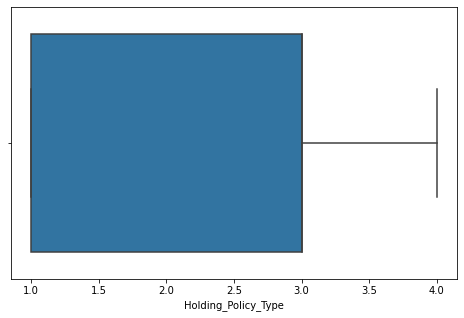

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot('Holding_Policy_Type',data=train)

<AxesSubplot:xlabel='Holding_Policy_Type'>

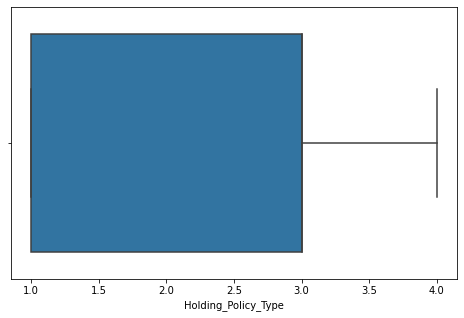

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot('Holding_Policy_Type',data=test)

__This shows that there are no outliers in this "Holding_Policy_Type" column__

In [14]:
# Imputing with mean
train['Holding_Policy_Type'] = train['Holding_Policy_Type'].fillna(train['Holding_Policy_Type'].mean())
test['Holding_Policy_Type'] = test['Holding_Policy_Type'].fillna(test['Holding_Policy_Type'].mean())

__We have imputed mean values on missing data of  "Holding_Policy_Type" column__

In [15]:
train['Holding_Policy_Type'].isnull().sum(),test['Holding_Policy_Type'].isnull().sum()

(0, 0)

__Above tuple shows that there are no any missing values in "Holding_Policy_Type" column__

In [16]:
# Imputing with mode
train['Health Indicator'] = train['Health Indicator'].fillna(train['Health Indicator'].mode()[0])
test['Health Indicator'] = test['Health Indicator'].fillna(test['Health Indicator'].mode()[0])

__We have imputed mode values on missing data of  "Health Indicator" column__

In [17]:
train['Health Indicator'].isnull().sum(),test['Health Indicator'].isnull().sum()

(0, 0)

__Above tuple shows that there are no any missing values in "Health Indicator" column__

In [18]:
# Imputing with mode
train['Holding_Policy_Duration'] = train['Holding_Policy_Duration'].fillna(train['Holding_Policy_Duration'].mode()[0])
test['Holding_Policy_Duration'] = test['Holding_Policy_Duration'].fillna(test['Holding_Policy_Duration'].mode()[0])

__We have imputed mode values on missing data of  "Holding_Policy_Duration" column__

In [19]:
train['Holding_Policy_Duration'].isnull().sum(),test['Holding_Policy_Duration'].isnull().sum()

(0, 0)

__Above tuple shows that there are no any missing values in "Holding_Policy_Duration" column__

### Step 4: Exploratory Data Analysis

In [20]:
# Get the list of columns
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [21]:
#Get the first 8 rows of dataframe
train.head(8)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.000000,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,1.0,2.439228,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.000000,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.000000,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.000000,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.000000,22,15264.0,1
6,7,C3,679,Owned,Individual,28,28,No,X1,1.0,2.439228,17,10640.0,0
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.000000,17,29344.0,1


In [22]:
# Get the information of the dataframe like dtypes, nullcount
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         50882 non-null  object 
 9   Holding_Policy_Duration  50882 non-null  object 
 10  Holding_Policy_Type      50882 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [23]:
# Get statistical data of train dataset
train.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,0.795995,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,2.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,2.439228,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [24]:
# Find out the correlation between all dataset
train.corr()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
ID,1.000000,-0.000465,-0.001725,0.001101,0.005153,-0.002235,-0.002350,0.005159
Region_Code,-0.000465,1.000000,-0.005649,-0.005928,0.009052,-0.065120,-0.010797,0.001121
Upper_Age,-0.001725,-0.005649,1.000000,0.921392,0.101785,0.025257,0.792689,0.002772
Lower_Age,0.001101,-0.005928,0.921392,1.000000,0.087621,0.021163,0.615739,-0.002099
Holding_Policy_Type,0.005153,0.009052,0.101785,0.087621,1.000000,0.061613,0.091535,0.007221
Reco_Policy_Cat,-0.002235,-0.065120,0.025257,0.021163,0.061613,1.000000,0.060989,0.114321
Reco_Policy_Premium,-0.002350,-0.010797,0.792689,0.615739,0.091535,0.060989,1.000000,0.007943
Response,0.005159,0.001121,0.002772,-0.002099,0.007221,0.114321,0.007943,1.000000


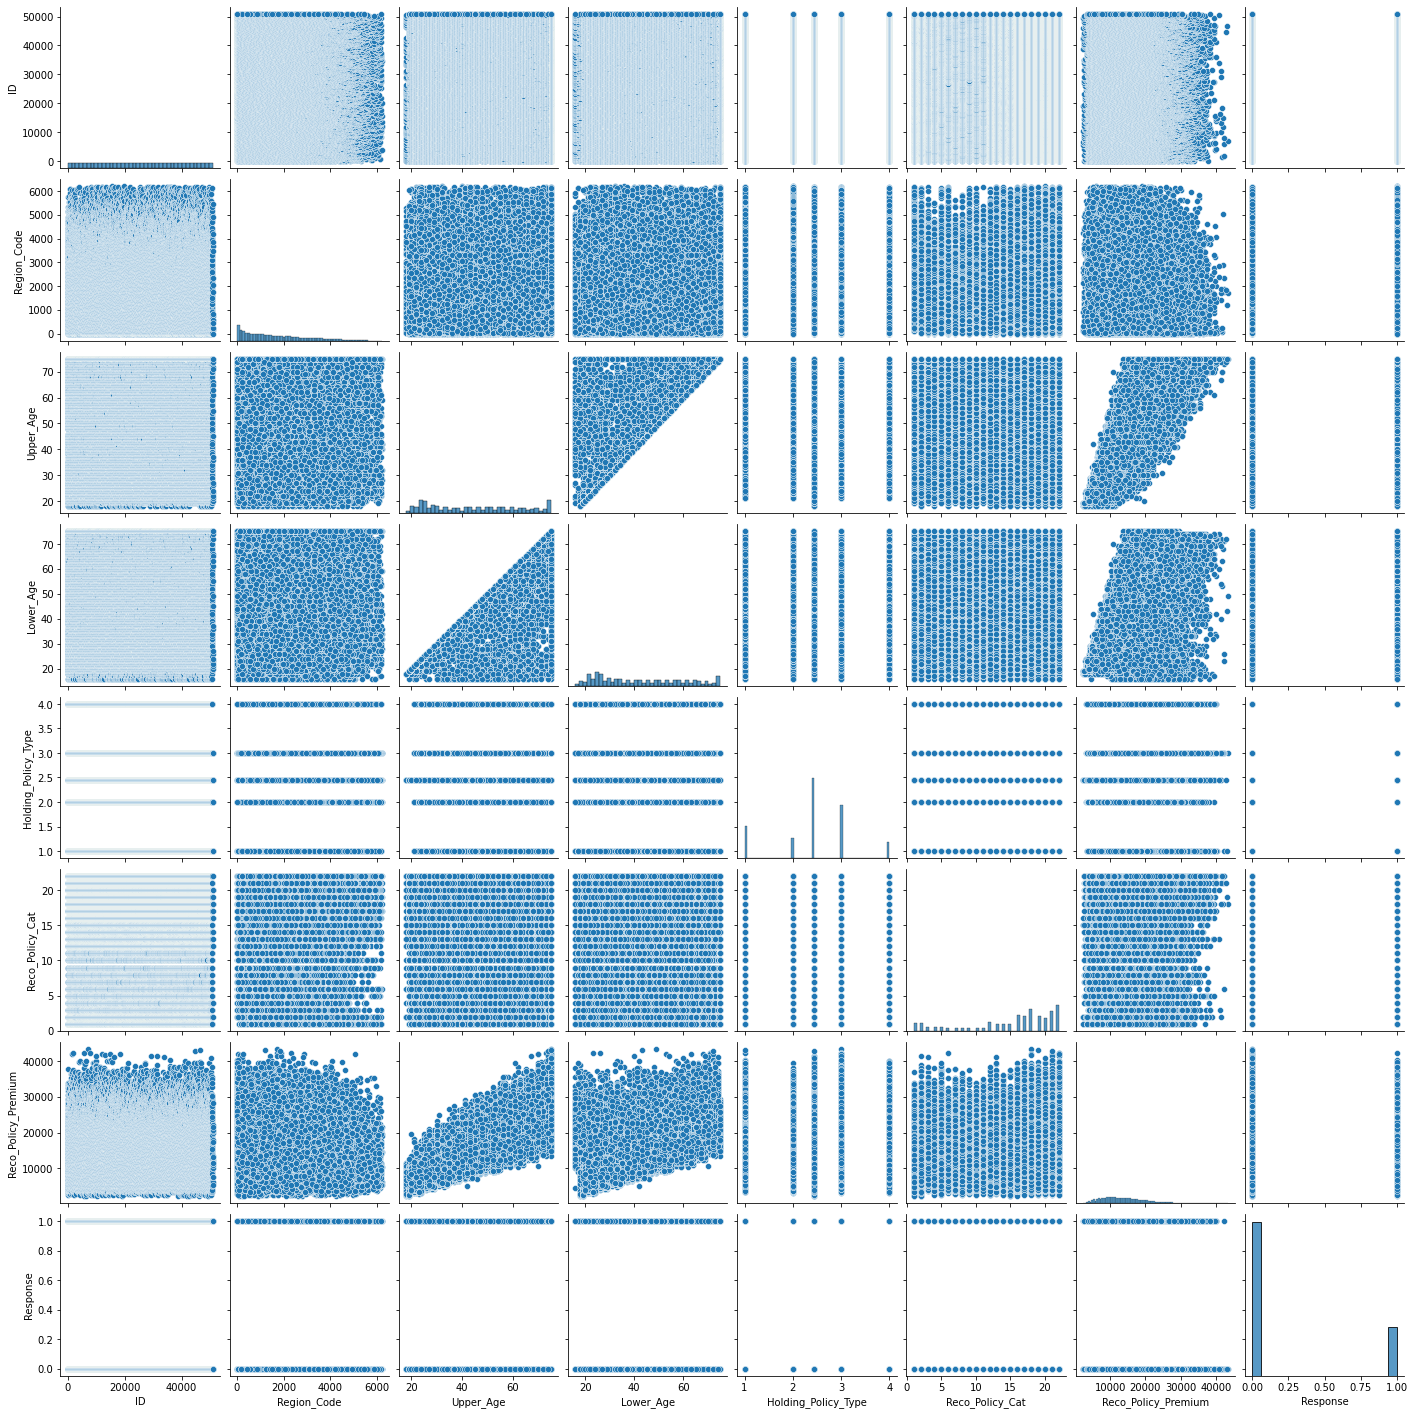

In [25]:
# Pairplot helps us for EDA at many level
sns.pairplot(train)

In [26]:
# This method gives us categorical count of respected features
train['Accomodation_Type'].value_counts()

Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64

<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

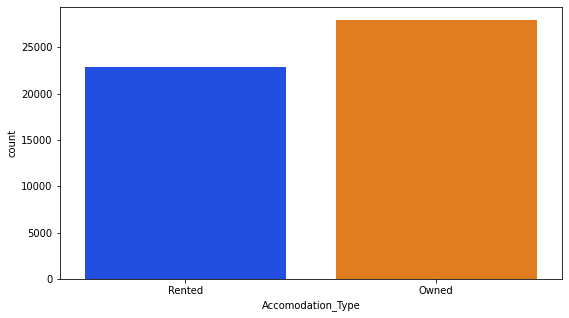

In [27]:
# matplotlib.pyplot as alise as plt function gives us figure method to view the figure and set the size
plt.figure(figsize=(9,5))

# This countplot is useful to see the graphical representation of categorical data
sns.countplot('Accomodation_Type',data=train, palette='bright')

In [28]:
train['Reco_Insurance_Type'].value_counts()

Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64

<AxesSubplot:xlabel='Reco_Insurance_Type', ylabel='count'>

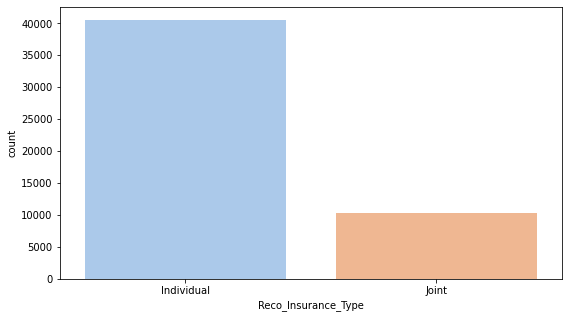

In [29]:
plt.figure(figsize=(9,5))
sns.countplot('Reco_Insurance_Type',data=train, palette='pastel')

<AxesSubplot:xlabel='Reco_Insurance_Type', ylabel='Accomodation_Type'>

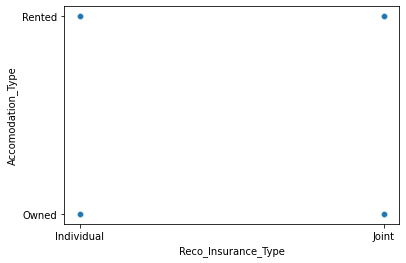

In [30]:
sns.scatterplot(data=train, x="Reco_Insurance_Type", y="Accomodation_Type")

In [31]:
train['Is_Spouse'].value_counts()

No     42460
Yes     8422
Name: Is_Spouse, dtype: int64

<AxesSubplot:xlabel='Is_Spouse', ylabel='count'>

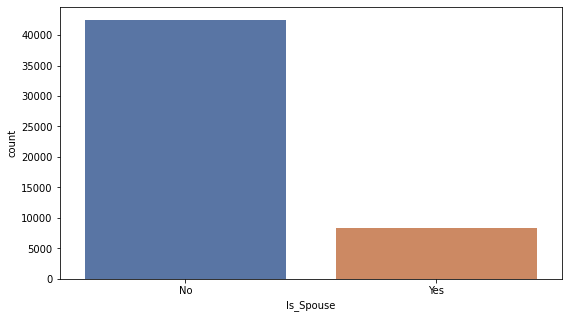

In [32]:
plt.figure(figsize=(9,5))
sns.countplot('Is_Spouse',data=train, palette='deep')

<AxesSubplot:xlabel='Reco_Insurance_Type', ylabel='Is_Spouse'>

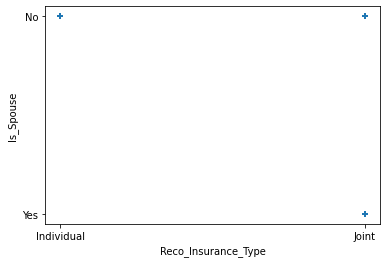

In [33]:
# The scatter plot tells us that individual have always no with the Is_Spouse but joint can have or have not be
sns.scatterplot(data=train, x="Reco_Insurance_Type", y="Is_Spouse", marker='+')

In [34]:
# there are only 9 types of health indicator for all customers
train['Health Indicator'].value_counts()

X1    24701
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

<AxesSubplot:xlabel='Health Indicator', ylabel='count'>

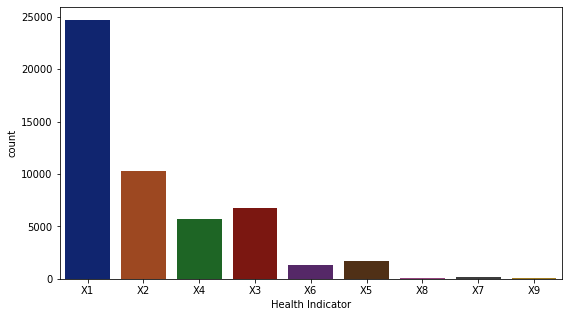

In [35]:
plt.figure(figsize=(9,5))
sns.countplot('Health Indicator',data=train, palette='dark')

__Above figure shows that most of the cusotmers are covered into the X1 health indicator__

In [36]:
# We will replace 14+ to 15 for better prediction experience
train['Holding_Policy_Duration'].replace(["14+"],[15.0], inplace= True)

In [37]:
#This 14+ is taken as a object where all others are float so we will not keep it as different.
#train['Holding_Policy_Duration'] = train['Holding_Policy_Duration'].astype(object).astype('float64')

In [38]:
train['Holding_Policy_Duration'].value_counts()

1.0     24750
15.0     4335
2.0      4260
3.0      3586
4.0      2771
5.0      2362
6.0      1894
7.0      1645
8.0      1316
9.0      1114
10.0      813
11.0      546
12.0      513
13.0      511
14.0      466
Name: Holding_Policy_Duration, dtype: int64

<AxesSubplot:xlabel='Holding_Policy_Duration', ylabel='count'>

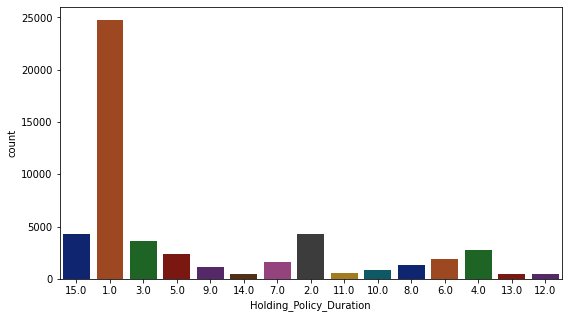

In [39]:
# In years
plt.figure(figsize=(9,5))
sns.countplot('Holding_Policy_Duration',data=train, palette='dark')

__Above figure shows that most of the customers have 1 year holding policy duration.__

In [40]:
train['Holding_Policy_Type'].value_counts()

2.439228    20251
3.000000    13279
1.000000     8173
2.000000     5005
4.000000     4174
Name: Holding_Policy_Type, dtype: int64

<AxesSubplot:xlabel='Holding_Policy_Type', ylabel='count'>

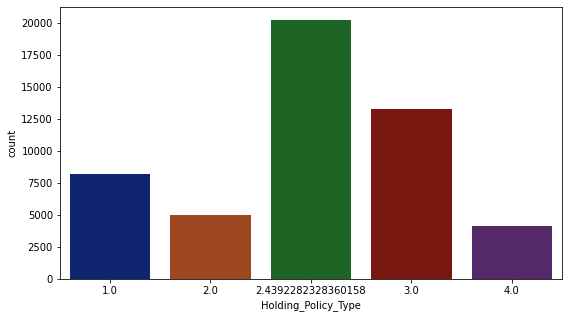

In [41]:
plt.figure(figsize=(9,5))
sns.countplot('Holding_Policy_Type',data=train, palette='dark')

__Above figure shows that Holding policy type 3.0 holds most the customers.__

<AxesSubplot:xlabel='Holding_Policy_Type', ylabel='Holding_Policy_Duration'>

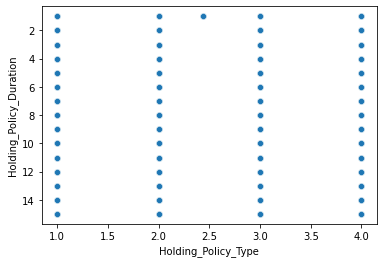

In [42]:
sns.scatterplot(data=train, x="Holding_Policy_Type", y="Holding_Policy_Duration")

__This figure shows that almost all holding policy types have all types of holding policy duration.__

<AxesSubplot:xlabel='Reco_Policy_Cat', ylabel='Reco_Policy_Premium'>

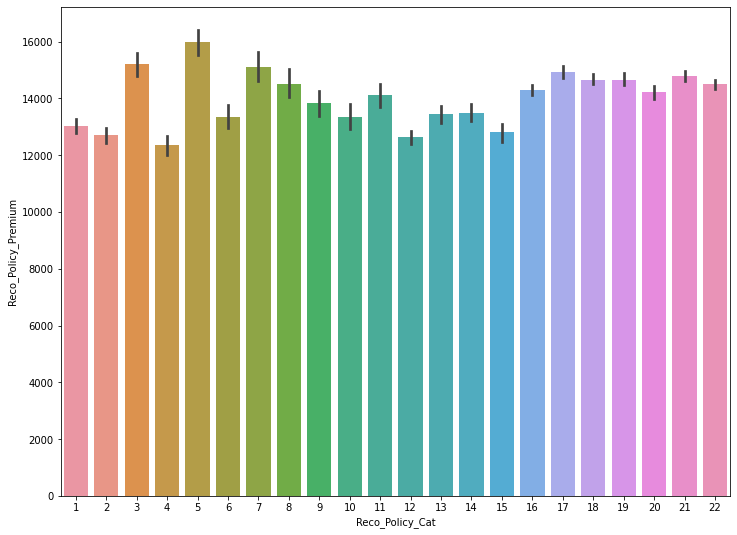

In [43]:
# This is a bar plot.
plt.figure(figsize=(12,9))
sns.barplot(y='Reco_Policy_Premium',x='Reco_Policy_Cat',data=train)

<AxesSubplot:xlabel='City_Code', ylabel='Region_Code'>

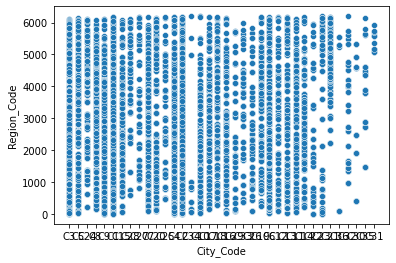

In [44]:
sns.scatterplot(data=train, x='City_Code', y='Region_Code')

### Step 5 : Feature Engineering

In [45]:
# Feature Scaling
features = ['City_Code','Accomodation_Type','Reco_Insurance_Type','Upper_Age','Lower_Age','Is_Spouse','Health Indicator',
            'Holding_Policy_Duration','Holding_Policy_Type','Reco_Policy_Cat','Reco_Policy_Premium']
X = pd.get_dummies(train[features],drop_first = True)
X_test = pd.get_dummies(test[features],drop_first = True)
ss = StandardScaler()
X = ss.fit_transform(X)
X_test = ss.transform(X_test)

In [46]:

#dataMapping1 = { "Rented" : 0, "Owned" : 1}
#dataMapping2 = { "Individual" : 1, "Joint" : 0}
#dataMapping3 = { 'No' : 0, 'Yes' : 1}
#dataMapping4 = {'X1' : 1, 'X2' : 2, 'X3' : 3, 'X4' : 4, 'X5' : 5, 'X6' : 6, 'X7' : 7, 'X8' : 8, 'X9' : 9}
#dataMapping5 = {'C3' : 3, 'C5' : 5, 'C24' : 24, 'C8' : 8, 'C9' : 9, 'C1' : 1, 'C15' : 15, 'C28' : 28,
#                'C27' : 27, 'C7' : 7, 'C20' : 20, 'C25' : 25, 'C4' : 4, 'C2' : 2, 'C34' : 34, 'C10' : 10, 
#                'C17' : 17, 'C18' : 18, 'C16' : 16, 'C29' : 29, 'C33' : 33, 'C26' : 26, 'C19' : 19, 'C6' : 6,
#                'C12' : 12, 'C13' : 13, 'C11' : 11, 'C14' : 14, 'C22' : 22, 'C23' : 23, 'C21' : 21, 'C36' : 36,
#               'C32' : 32, 'C30' : 30, 'C35' : 35, 'C31' : 31}
                

In [47]:

#train['Accomodation_Type'] = train['Accomodation_Type'].map(dataMapping1)
#train['Reco_Insurance_Type'] = train['Reco_Insurance_Type'].map(dataMapping2)
#train['Is_Spouse'] = train['Is_Spouse'].map(dataMapping3)
#train['Health Indicator'] = train['Health Indicator'].map(dataMapping4)
#train['City_Code'] = train['City_Code'].map(dataMapping5)

###  Step 6: Building Model

In [48]:
# One hot coding
y = train["Response"]
features = ['City_Code','Accomodation_Type','Reco_Insurance_Type','Upper_Age','Lower_Age','Is_Spouse','Health Indicator',
            'Holding_Policy_Duration','Holding_Policy_Type','Reco_Policy_Cat','Reco_Policy_Premium']
X = pd.get_dummies(train[features],drop_first = True)
X_test = pd.get_dummies(test[features],drop_first = True)

In [49]:
#DecisionTreeClassifier Model
model = DecisionTreeClassifier()
model.fit(X, y)
Response = model.predict(X_test)
output = pd.DataFrame({'ID': test.ID, 'Response': Response})
output.to_csv('my_submission.csv', index=False)
SuccessRate = round(model.score(X, y) * 100, 2)
SuccessRate

99.99

In [50]:
#RandomForestClassifier =  max_depth = 100
model = RandomForestClassifier(n_estimators=100, max_depth=100, random_state=1)
model.fit(X, y)
Response = model.predict(X_test)
SuccessRate = round(model.score(X, y) * 100, 2)
SuccessRate

99.99

In [51]:
#KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)
Response = model.predict(X_test)
SuccessRate = round(model.score(X, y) * 100, 2)
SuccessRate

82.26

In [52]:
#LogisticRegression Model
model = LogisticRegression(class_weight='balanced')
model.fit(X, y)
Response = model.predict(X_test)
SuccessRate = round(model.score(X, y) * 100, 2)
SuccessRate

48.29

In [53]:
#RandomForestClassifier Model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
Response = model.predict(X_test)
SuccessRate = round(model.score(X, y) * 100, 2)
SuccessRate

76.01

In [54]:
#GaussianNB Model
model = GaussianNB()
model.fit(X, y)
Response = model.predict(X_test)
SuccessRate = round(model.score(X, y) * 100, 2)
SuccessRate

76.01

In [55]:
# LinearSVC Model
model = LinearSVC()
model.fit(X, y)
Response = model.predict(X_test)
SuccessRate = round(model.score(X, y) * 100, 2)
SuccessRate

27.04